## Stationarity in Time Series

Stationarity is an important idea in time series analysis. A time series is considered stationary if its statistical properties—like the mean, variance, and autocovariance—stay constant over time. This matters because methods like ARIMA and ARMA are designed to work with stationary data, so it’s a good idea to check for stationarity before using these models.

Stationarity can be classified into two types:

1. Strict stationarity implies that the **entire distribution of the process remains the same over time**.  
2. Weak stationarity, also known as second-order stationarity, requires only that the **mean, variance, and autocovariance remain time-invariant** over time.  

### Why Do We Care About Stationarity?

Imagine we are analyzing synthetic stock prices that exhibit both an upward trend and random fluctuations over time. Suppose our goal is to study the seasonal variations in these stock prices throughout the year. However, the data we have spans several years, during which the stock prices have been steadily increasing. This steady increase introduces non-stationarity, complicating our analysis of seasonal patterns.

**Addressing Non-Stationarity: Detrending the Data**

To effectively analyze the seasonal component, we first need to remove the non-stationary trend. This can be accomplished by fitting a linear model to the data using least squares regression:

$$\text{Stock Price} = b \times \text{Time} + z$$

Where:

- $b$ is the slope representing the trend over time.
- $z$ is the intercept.

By subtracting this linear trend from the original stock price data, we obtain "detrended" stock prices. This process isolates the seasonal fluctuations by eliminating the underlying upward trend.

**Visualization**

<img src="s1.png">

- Top panel displays the synthetic stock prices over time with a fitted linear trend (red dashed line) using least squares regression. This trend captures the overall upward movement in stock prices.
- Bottom panel shows the detrended stock prices (residuals), highlighting the seasonal variations after removing the linear trend. These residuals are more suitable for analyzing periodic patterns without the confounding effect of the trend.

### Intuition for Stationary Time Series

A **stationary time series** behaves similarly over time, meaning:

- The mean of the series shows **no trend** and does not systematically change over time.
- The variability around the mean has a **constant variance**, remaining stable throughout.
- There are **no periodic fluctuations** such as seasonality or cyclic behavior, unless explicitly modeled.

This means that the statistical properties of one segment of the series are similar to those of any other segment, allowing us to predict future behavior based on past data.

### Strict Stationarity

A process is said to be **strictly stationary** if the joint distribution of any subset of observations $X_{t_1}, X_{t_2}, \dots, X_{t_k}$ is the same as the distribution of $X_{t_1 + \tau}, X_{t_2 + \tau}, \dots, X_{t_k + \tau}$ for all $\tau$. 

In simple terms, the process looks the same no matter how we shift it in time. Strict stationarity implies that:

- The distribution of $X_t$ does not change over time.
- All moments of the distribution (mean, variance, higher moments) are constant over time.

### Weak (Second-Order) Stationarity

Weak stationarity, also known as **second-order stationarity**, requires only that the **first two moments** (mean and variance) and the **autocovariance** depend solely on the lag between observations, not on time itself.

A time series $\{X_t\}$ is weakly stationary if:

1. The **mean** of the series is constant: $E[X_t] = \mu$ for all $t$.
2. The **variance** is constant: $\text{Var}(X_t) = \sigma^2$ for all $t$.
3. The **autocovariance** between $X_t$ and $X_{t+k}$ depends only on the lag $k$, not on $t$:

$$
\text{Cov}(X_t, X_{t+k}) = \gamma(k)
$$

Weak stationarity is often sufficient for most time series models, as it focuses on ensuring that the mean and variance remain stable over time, making the process easier to model and analyze.

### Properties of Stationary Processes

#### Mean, Variance, and Autocovariance Functions

To analyze a stationary process, we focus on three key functions:

- The **mean function** $\mu(t) = E[X_t]$ represents the expected value of the process at time $t$, and for a stationary process, this should remain constant.
- The **variance function** $\sigma^2(t) = \text{Var}(X_t)$ gives the variance at time $t$, which must also be constant for stationarity.
- The **autocovariance function** $\gamma(k) = \text{Cov}(X_t, X_{t+k})$ measures how the process correlates with itself at different time lags $k$, and for a stationary process, it depends only on the lag $k$, not on time $t$.

#### Autocorrelation and Bounds

For a weakly stationary process, the **autocorrelation function** $\rho(k)$, which measures the correlation between two points in the series separated by lag $k$, is bounded by -1 and 1:

$$
-1 \leq \rho(k) \leq 1
$$

This bound can be derived from basic linear algebra principles that apply to correlations between random variables.

### Examples of Stationary Processes

#### **White Noise**

White noise is the simplest example of a stationary process. It is defined as a sequence of uncorrelated, identically distributed random variables:

$$
X_t \sim \mathcal{N}(0, \sigma^2)
$$

Properties of white noise:

- The **mean** is constant: $E[X_t] = 0$.
- The **variance** is constant: $\text{Var}(X_t) = \sigma^2$.
- The **autocovariance** function is:
  
$$
\gamma(k) = 
\begin{cases}
\sigma^2 & \text{if } k = 0 \\
0 & \text{if } k \neq 0
\end{cases}
$$

- The **autocorrelation** function is:

$$
\rho(k) = 
\begin{cases}
1 & \text{if } k = 0 \\
0 & \text{if } k \neq 0
\end{cases}
$$

Below is a plot of synthetically generated white noise:

<img src="s2.png">

Thus, white noise is a stationary process because its mean and variance are constant, and its autocovariance depends only on the lag.

#### Moving Average (MA) Process

A **moving average (MA) process** of order $q$, denoted as MA(q), is another example of a weakly stationary process. It is defined as:

$$
X_t = \beta_0 Z_t + \beta_1 Z_{t-1} + \dots + \beta_q Z_{t-q}
$$

where $Z_t \sim \mathcal{N}(0, \sigma_Z^2)$ are independent white noise terms.

For an MA(q) process:

- The **mean** is zero: $E[X_t] = 0$.
- The **variance** is constant:

$$
\text{Var}(X_t) = \sigma_Z^2 \sum_{i=0}^{q} \beta_i^2
$$

- The **autocovariance** function $\gamma(k)$ depends on the lag $k$:

$$
\gamma(k) = 
\begin{cases}
\sigma_Z^2 \sum_{i=0}^{q-k} \beta_i \beta_{i+k} & \text{if } k \leq q \\
0 & \text{if } k > q
\end{cases}
$$
  
The autocorrelation function $\rho(k)$ is obtained by normalizing the autocovariance by the variance:

$$
\rho(k) = \frac{\gamma(k)}{\gamma(0)}
$$

Below is a plot of the Moving Average (MA) process of order $q=2$:

<img src="s3.png">

The MA(q) process is weakly stationary because its mean and variance are constant, and the autocovariance depends only on the lag.

### Non-Stationary Processes 

A **non-stationary process** is a time series whose statistical properties—such as mean, variance, and autocorrelation—change over time. Unlike stationary processes, which have consistent statistical characteristics, non-stationary series can exhibit trends, seasonal effects, or other forms of structural changes that complicate analysis.

Non-stationary processes can generally be categorized into two types:

1. **Trend-Stationary Processes**
2. **Difference-Stationary Processes**

#### Trend-Stationary Processes

A **trend-stationary** series has a stable long-term trend around which the data fluctuates. If a time series follows a trend-stationary process, it tends to revert to its trend line after experiencing a disturbance.

**De-trending:** 

To achieve stationarity in such series, one can remove the trend component. This is typically done by fitting a trend line (e.g., linear or polynomial) to the data and subtracting it from the original series. The resulting series, with the trend removed, should exhibit stationary behavior.

#### Difference-Stationary Processes

When de-trending is insufficient to stabilize the mean and variance of a series, the process might be **difference-stationary**. In these cases, even after removing the trend, the series still exhibits non-constant statistical properties.

**Differencing:** 

To achieve stationarity, we transform the series by taking differences between consecutive observations (period-to-period) or between observations separated by a season (season-to-season). This transformation often stabilizes the mean and variance, resulting in a stationary series of changes rather than levels.

#### Transformations to Achieve Stationarity

To prepare a non-stationary time series for modeling with techniques that require stationarity (like ARIMA), various **transformations** can be applied:

**Differencing**

- Differencing removes trends from time series data and stabilizes the mean.  
- It involves computing the difference between consecutive observations in the series.  
- The first difference of a series $Y_t$ is defined as $\Delta Y_t = Y_t - Y_{t-1}$.  
- Higher-order differencing can be applied if trends persist, such as the second difference $\Delta^2 Y_t = \Delta Y_t - \Delta Y_{t-1}$.  
- Differencing is especially useful for converting non-stationary data into a stationary form.  

**Logarithmic Transformations**

- Logarithmic transformations stabilize variance when variability increases with the magnitude of the data.  
- The natural logarithm (or another logarithm base) is applied to each data point in the series.  
- For a series $Y_t$, the transformed series becomes $\log(Y_t)$.  
- This method is particularly effective for data exhibiting exponential growth or multiplicative seasonality.  
- It also compresses the scale of large values, making trends easier to identify visually.  

**Detrending**

- Detrending removes long-term trends from data to highlight short-term fluctuations.  
- A trend line is fitted to the data and then subtracted from the original series.  
- For a linear trend $Y_t = \alpha + \beta t + \epsilon_t$, the detrended series is computed as $Y_t - (\alpha + \beta t)$.  
- Non-linear trends can be removed by fitting polynomial or exponential functions.  
- Detrending helps in isolating cyclical or seasonal patterns from broader trends.  

#### The Random Walk Model

A **random walk** is a classic example of a non-stationary process. It is characterized by each value being a random step away from the previous value, making its statistical properties dependent on time.

#### Definition

A random walk can be mathematically expressed as:

$$
X_t = X_{t-1} + Z_t
$$

where:

- $X_t$ is the value of the series at time $t$.
- $Z_t$ is a white noise term (a sequence of uncorrelated random variables with mean zero and constant variance).

#### Properties of a Random Walk

I. **Mean**

The expected value (mean) of $X_t$ grows over time:

$$
E[X_t] = t \cdot \mu
$$

where $\mu$ is the mean of $Z_t$.

II. **Variance**

The variance of $X_t$ increases linearly with time:

$$
\text{Var}(X_t) = t \cdot \sigma^2
$$

where $\sigma^2$ is the variance of $Z_t$.

Because both the mean and variance depend on time, a random walk is inherently **non-stationary**.

#### Transforming a Random Walk into a Stationary Series

To utilize statistical models that require stationarity, it's necessary to transform a random walk into a stationary series. This is achieved through **differencing**.

##### Differencing Operator

The **difference operator** \( \Delta \) is used to remove trends and stabilize the mean of a time series. It is defined as:

$$
\Delta X_t = X_t - X_{t-1} = Z_t
$$

Applying the difference operator to a random walk:

I. **First Difference:**

$$
\Delta X_t = X_t - X_{t-1} = Z_t
$$

Since $Z_t$ is white noise, the differenced series $\Delta X_t$ is **stationary**.

II. **Resulting Series:**

- The differenced series has a constant mean (assuming $Z_t$ has mean zero).
- The variance is constant over time.
- There is no autocorrelation in the differenced series if $Z_t$ is truly white noise.

Thus, differencing a random walk transforms it into a **stationary white noise** series, which is suitable for modeling with techniques that assume stationarity.


I. Simulating a Random Walk:

- A random walk is generated by taking the cumulative sum of normally distributed random numbers. This produces a series where each value depends on the previous one plus some random noise.
- The random walk is non-stationary because it lacks a constant mean and variance over time—it drifts unpredictably.

II. Differencing:

- Differencing transforms the non-stationary series into a stationary one by subtracting the previous observation from the current one. This removes any trend or long-term structure in the data.
- In Python, this is done using `np.diff()`, which takes the difference between consecutive elements of the series.

The result plot would look like the following:

<img src="s4.png">

In this plot, the upper section shows the random walk (non-stationary), while the lower section shows the differenced series (stationary). Differencing removes the trend from the original series, making it easier to model and predict future values.


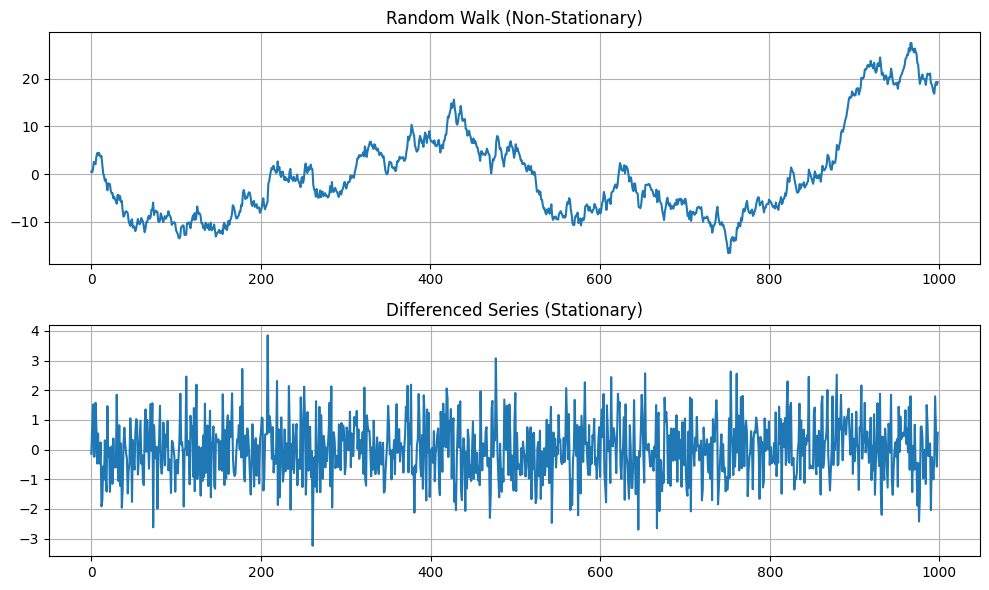

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate a random walk
np.random.seed(42)
N = 1000
Z = np.random.normal(0, 1, N)
X = np.cumsum(Z)  #

# Random walk as cumulative sum of white noise

# Apply differencing to make it stationary
diff_X = np.diff(X)

# Plot the original random walk and the differenced series
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(X, label='Random Walk')
plt.title('Random Walk (Non-Stationary)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(diff_X, label='Differenced Series')
plt.title('Differenced Series (Stationary)')
plt.grid(True)

plt.tight_layout()
plt.show()